## User Knowledge Classification Model Project
##### Group 41: Daeun (Kelly) Lee (66638206), Jessie Megan (32533242), Mia (Ziqing) Ling (62106489), Renee Chan (61500666)

### 1. Introduction

Adaptive learning system, also known as adaptive learning environment, is a new web-based learning system which aims to help learners acquire knowledge and skills in specific learning areas.
<br><br>
However, for web-based adaptive learning environments in different fields, creating effective user knowledge models is a crucial task. Specifically, the most important disadvantage of user knowledge models is that they only classify user knowledge without considering the weight difference between user domain related data (Kahraman, Sagiroglu and Colak, 2013). As various factors can play a significant role in a student’s knowledge level, understanding the attributes that contribute to knowledge levels can help improve the efficiency of the web-based adaptive learning environments. 
<br><br>
This project utilizes the User Knowledge Modeling Dataset to predict the knowledge level of a user (UNS) through a classification model created with the k-nearest neighbor algorithm. This dataset examines a group of student’s knowledge pertaining to the subject of Electrical DC machines. The knowledge level can be classified as `Very_Low`, `Low`, `Middle`, and `High`. These classes simply indicate levels of beginner, intermediate, expert, and advanced (Colak, Sagiroglu, and Kahraman, 2008). 
<br><br>
To be specific, we are going to use the following attribues as the candidate predictor to build the classification model to predict the `UNS` (The knowledge level of user) level: <br>
1) `STG` (The degree of study time for goal object materials) <br>
2) `SCG` (The degree of repetition number of user for goal object materials) <br>
3) `STR` (The degree of study time of user for related objects with goal object) <br>
4) `LPR` (The exam performance of user for related objects with goal object) <br>
5) `PEG` (The exam performance of user for goal objects) <br>

In specific, we are going to use `LPR` and `PEG` as the predictors among all other potentially possible predictor variables and their combinations as the combination of `LPR` and `PEG` provide the maximum accuracy among all other combinations of the predictors. 

### 2. Methods & Results
<p style='text-align:justify;'> 
We first load all packages needed to do our analysis. Then we load, wrangle, and explore the data. 
</p>

In [1]:
# Load the libraries
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

The data we analyze is stored in a `.xlsx` file with headers, so we load it using `read_excel` while specifying `col_names` to `TRUE`. We select the predictor variables we are interested in, and the target variable. Using `mutate`, we convert UNS to a factor, using `as_factor`, because we are working with it as a categorical statistical variable. This dataset is already in a tidy format, with each row containing one observation, each column containing one variable, and each cell containing one value. There are also no `NA` values, hence, we do not need to clean it again.

In [2]:
# Read the dataset and display a snapshot of the orginal dataset
user_modeling_dataset <- read_excel(path = "data/User_Modeling_Data.xlsx", col_names = TRUE) %>%
    select("STG":"UNS") %>% 
    mutate(UNS = as_factor(UNS))
head(user_modeling_dataset)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


We then use `set.seed` to set our seed value to 1. This allows randomness in our model and ensures a reproducible workflow. Using `initial_split`, we split the data into training and testing sets, specifying `prop = 0.75`, so that 75% of the original dataset is assigned to the training set and 25% of the data is assigned to the testing set. We chose to put 75% of our data into the training set to maximize training of our classifier, while having an appropriate proportion of data in the testing set to have an accurate representation of the classifier's accuracy. We also set `strata` to our target variable (`UNS`).

In [3]:
#set seed with Value=1
set.seed(1)

# split the dataset by 75%
user_modeling_split <- initial_split(user_modeling_dataset, prop = 0.75, strata = UNS)


Next, we use the `training` and `testing` functions to extract the training and testing sets. We use `head` to not take much space when glimpsing the dataset.


In [4]:
# train set
user_modeling_train <- training(user_modeling_split) 

# test set
user_modeling_test <- testing(user_modeling_split) 

head(user_modeling_train)
# training data will be 75% of the original dataset 
head(user_modeling_test)
# testing data will be 25% of the original dataset

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.08,0.080,0.10,0.24,0.90,High
0.00,0.000,0.50,0.20,0.85,High
0.09,0.300,0.68,0.18,0.85,High
0.08,0.325,0.62,0.94,0.56,High
0.20,0.490,0.60,0.20,0.78,High
0.13,0.390,0.85,0.38,0.77,High


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.10,0.10,0.43,0.29,0.56,Middle
0.20,0.14,0.35,0.72,0.25,Low
0.18,0.18,0.55,0.30,0.81,High
0.06,0.06,0.51,0.41,0.30,Low
0.10,0.10,0.70,0.15,0.90,High
0.12,0.12,0.75,0.35,0.80,High


To explore our data, we use `group_by`, `summarize` and `n` to find the number and percentage of `UNS` levels.

In [5]:
# Calculate the number and percentage of 4 different UNS levels.
UNS_table <- user_modeling_train %>% 
    group_by(UNS) %>% 
    summarize(count = n(), percentage = n() / nrow(user_modeling_train) * 100)
UNS_table

UNS,count,percentage
<fct>,<int>,<dbl>
very_low,37,12.33333
High,76,25.33333
Low,96,32.00000
Middle,91,30.33333


The table above summarizes the number of observations in each class of `UNS`. There are 76 (∼25.33%) `High`, 91 (∼30.33%) `Middle`, 96 (∼32%) `Low`, and 37 (∼12.34%) `very_low` observations. There is an imbalance in class `very_low`, possibly due to the nature of the user population on Electrical DC machines. It is assumed that the `very low` class has a smaller percentage because individuals had a baseline knowledge of Electrical DC machines, regardless of their scores in each attribute. Consequently, the `very_low` observations does not appear as much and does not have a strong vote. This can be solved by oversampling it so it has a stronger vote; however, we choose not to as we want to preserve the original data.
<br><br>
After that, we choose our predictors by testing the accuracy of the predictor combination.
<br><br>
As using more predictors may not result in better predictions, and including some irrelevant predictors can negatively affect classifier performance, the selection of predictor variables has a significant influence on the classification model. Thus, we select the best predictor combination based on the accuracy by K-nearest neighbors algorithm.
<br><br>
First, we generate an individual model to include all subsets of predictors that will be used as the dataset to find the best predictor combination.

In [6]:
#create the separate model for every possible subset of predictors
names <- colnames(user_modeling_train |> select(-UNS))
head(user_modeling_train)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.08,0.080,0.10,0.24,0.90,High
0.00,0.000,0.50,0.20,0.85,High
0.09,0.300,0.68,0.18,0.85,High
0.08,0.325,0.62,0.94,0.56,High
0.20,0.490,0.60,0.20,0.78,High
0.13,0.390,0.85,0.38,0.77,High


In [7]:
# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
user_vfold <- vfold_cv(user_modeling_train, v = 5, strata = UNS)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("UNS", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        user_recipe <- recipe(as.formula(model_string), 
                                data = user_modeling_train) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(user_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = user_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

# add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,UNS ~ PEG,0.8503228
2,UNS ~ PEG+LPR,0.9599677
3,UNS ~ PEG+LPR+SCG,0.9434033
4,UNS ~ PEG+LPR+SCG+STG,0.8894027
5,UNS ~ PEG+LPR+SCG+STG+STR,0.7927845


Based on our analysis above, the combination of `PEG` and `LPR` will give us the highest accuracy of the predction which is around `96%`, thus using `PEG` and `LPR` as the two predictors to build our classification model will yield the best result with the highest accuracy.
<br><br>
Next, we can visualize the distribution of the two predictors we will choose.
<br><br>
Let’s create the first plot. Using `ggplot`, we will set `LPR` on the `x-axis`. On the next layers, we use `geom_histogram` then `facet_grid` to create a plot containing multiple subplots (each representing one `UNS` level). To split our plot horizontally, we insert the `rows` argument and then call the column name (`UNS`) by surrounding it with `vars`. Adding new layers, we use `labs` to add informative axis labels and `ggtitle` to give our plot a title. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



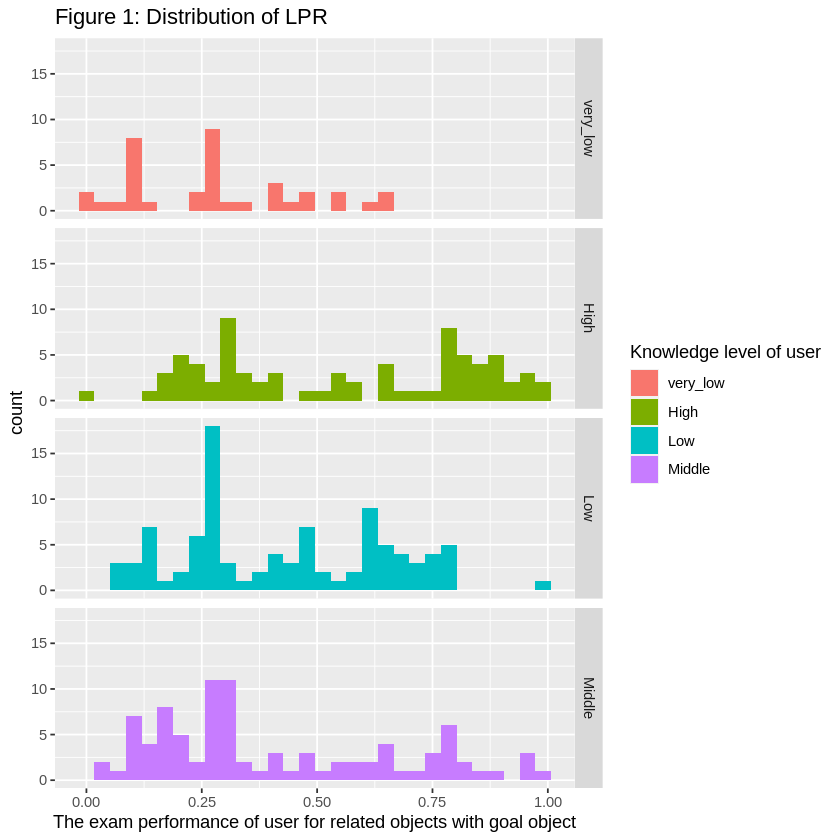

In [8]:
LPR_PLOT <- ggplot(user_modeling_train,aes(x = LPR, fill = UNS)) +
            geom_histogram() +
            facet_grid(rows = vars(UNS)) +
            labs(x = "The exam performance of user for related objects with goal object", 
                 fill = "Knowledge level of user") +
            ggtitle("Figure 1: Distribution of LPR")
LPR_PLOT

This plot shows that `LPR` has a similar distribution among all 4 different knowledge levels.
<br><br>
Repeat the steps before, but this time we use `PEG` on the `x-axis`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



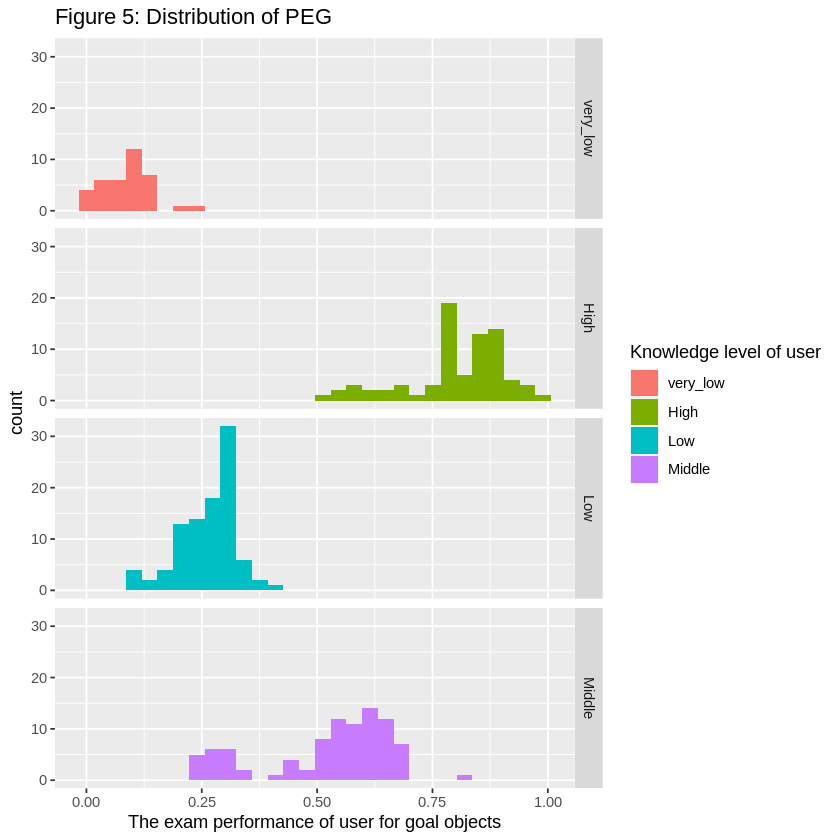

In [9]:
PEG_PLOT <- ggplot(user_modeling_train,aes(x = PEG,fill = UNS)) +
            geom_histogram() +
            facet_grid(rows = vars(UNS)) +
            labs(x = "The exam performance of user for goal objects", 
                 fill = "Knowledge level of user") +
            ggtitle("Figure 5: Distribution of PEG")
PEG_PLOT

This plot shows that:<br>
1) There is a narrow distribution of `PEG` between 0 and 0.25 for `very_low` knowledge level.<br>
2) There is a narrow and skewed distribution of `PEG` between 0.15 and 0.35 for `Low` knowledge level. <br>
3) There is a relatively narrow distribution of `PEG` between 0.25 and 0.70 for `Middle` knowledge level. <br>
4) There is a narrow distribution of `PEG` between 0.50 and 0.95 for `High` knowledge level.<br> 

Next, we choose the best K value for our classifier. We use the training data so that when we test our classifier's accuracy on the testing set, there is no bias towards the predictions as the classifier has not yet been exposed to the testing set. 
<br><br>
First, we use `set.seed` to set the seed value to 1 so our analysis will be reproducible.

In [10]:
# set the seed 
set.seed (1)

Then we call `nearest_neighbor` to create a `model specification`, specifying `weight_func` to `"rectangular"` (straight-line distance) and each parameter as `tune()`. Using `set_engine` and `set_mode`, we specify this is a `classification` problem that uses `kknn`.

In [11]:
# make a specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification") 

To standardize our data, we create a `recipe` where `UNS` is the target, while `LPR` and `PEG` are predictors. Then, we scale and center the data using `step_scale` and `step_center` to ensure the influence of each variable on our prediction is equal.

In [12]:
# make a recipe
user_modeling_recipe <- recipe(UNS ~ LPR + PEG, data = user_modeling_train) %>% 
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

Now we perform cross-validation. Using `vfold_cv`, we split the training set into 10 (`v = 10`) and set the `strata` argument to `UNS`. We choose to use a 10 fold cross-validation because it will give us a more accurate average across all the folds compared to using a lower amount of fold. We limit our cross-validation to 10 fold due to limitations in computational power. 

In [13]:
# specify folds - cross-validation
user_modeling_vfold = vfold_cv(user_modeling_train, v = 10, strata = UNS) 

The next step is to create a new `tibble` (`k_vals`) and specifying, using `seq`, that the neighbors variable contain values `from 1 to 30` (stepping `by 1`).  

In [14]:
# specify grid argument 
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

To create a workflow, we first call the `workflow` function. Then, we combine our `recipe` and `model specification` with `add_recipe` and `add_model`. We use `tune_grid` to fit the model and set `resamples` to our cross-validation while also passing `k_vals` to `grid`. Using `collect_metrics`, we aggregate the `mean` and `standard error` of the classifier’s validation accuracy across the folds. We then `filter` for `accuracy` in the `.metric` column. We use `head` to not take much space when glimpsing the dataset.
</p>

In [15]:
# make a workflow, run training data, collect the metrics 
user_modeling_fit <- workflow() %>%
       add_recipe(user_modeling_recipe) %>% 
       add_model(knn_tune) %>%
       tune_grid(resamples = user_modeling_vfold, grid = k_vals) %>% 
       collect_metrics() %>% 
       filter(.metric == "accuracy")%>%
      arrange(desc(mean))
head(user_modeling_fit)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,accuracy,multiclass,0.9643513,10,0.01280039,Preprocessor1_Model07
8,accuracy,multiclass,0.9643513,10,0.01280039,Preprocessor1_Model08
9,accuracy,multiclass,0.9578997,10,0.01145600,Preprocessor1_Model09
10,accuracy,multiclass,0.9578997,10,0.01145600,Preprocessor1_Model10
5,accuracy,multiclass,0.9572084,10,0.01258114,Preprocessor1_Model05
6,accuracy,multiclass,0.9572084,10,0.01258114,Preprocessor1_Model06


To visualize each K value’s accuracy, we use `ggplot` to set neighbors to `x-axis` and `mean` to `y-axis`. On the next layer, we create the visualization using `geom_point` and `geom_line`. Adding new layers, we use `labs` to add informative axis labels and `ggtitle` to give our plot a title.

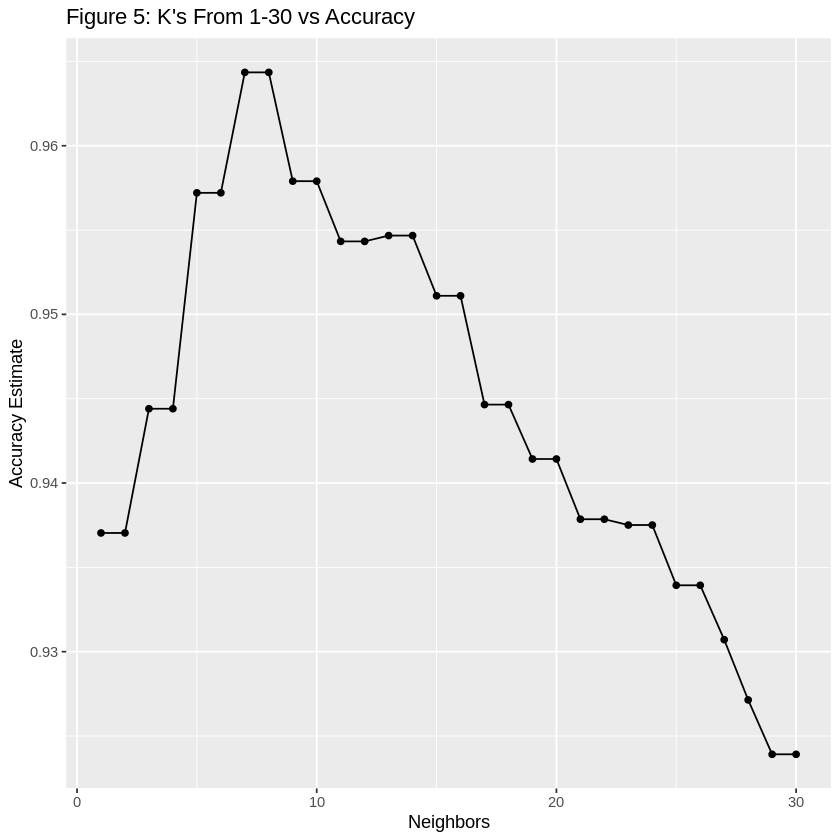

In [16]:
# plot the accuracy vs K 
accuracy_versus_k <- user_modeling_fit %>%
    ggplot(aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Figure 5: K's From 1-30 vs Accuracy")
accuracy_versus_k

The plot above shows that accuracy is highest using `K = 7` or `K = 8` nearest neighbours. We can use `filter` and `pull` to check individual accuracies of each `K`.

In [17]:
# accuracy at K = 7 or K = 8 on training data
user_modeling_fit %>% 
    filter(neighbors == "7") %>% 
    pull(mean)

user_modeling_fit %>% 
    filter(neighbors == "8") %>% 
    pull(mean)

# Using K = 7 and K = 8 yield the same accuracy

[1] 0.9643513

[1] 0.9643513

Both `K = 7` and `K = 8` have the highest accuracy around `96%`. However, we decide to use `K = 7` so that the cost of training the model is less prohibitive (i.e. using `K = 8` will take more computational power).
<br><br>
The next step is to rebuild our specification using `K = 7`, and we will run this classifier on the testing set. 
<br><br>
We first call `nearest_neighbor`, specifying `weight_func` to `"rectangular"` (straight-line distance) and `K = 7`. Using `set_engine` and `set_mode`, we specify this is a `classification` problem that uses `kknn`.

In [18]:
# run classifier on testing data 
test_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) %>% 
    set_engine("kknn") %>% 
    set_mode("classification") 

Next, we call `workflow` and combine our `recipe` and `model specification` into the workflow with `add_recipe` and `add_model`. After that, we use `fit` to run the whole workflow on the training data.

In [19]:
#Run the workflow
test_fit <- workflow() %>%
    add_recipe(user_modeling_recipe) %>% 
    add_model(test_spec) %>% 
    fit(data = user_modeling_train)

Now we run our classifier to predict the class labels for our testing set using `predict` and `bind_cols` which creates a new data frame where we add the column of predictions to the original test data. To assess our classifier’s accuracy, we use `metrics` to get the statistics of our model’s quality. We specify the `truth` to `UNS` and `estimate` to `.pred_class`, which contains the predicted diagnoses from the classifier. We then `filter` for `accuracy` in the `.metric` column and use `pull` to get the value.

In [20]:
#Generate the accuracy of our testing data when K=5
test_accuracy <- test_fit %>% 
    predict(user_modeling_test) %>% 
    bind_cols(user_modeling_test) %>% 
    metrics(truth = UNS, estimate = .pred_class) %>% 
    filter(.metric == "accuracy") %>% 
    pull(.estimate)
test_accuracy

[1] 0.9708738

Using our classifier with `K = 7` gives us approximately `97.087%` accuracy when running our testing data, which is close to our training data accuracy. 
<br><br>
Finally, we ran the classifier on a hypothetical user model to prove our thesis that users with lower `LPR` and `PEG` would likely be classified in a `very_low` `UNS` level, and users with high `LPR` and `PEG` would be classfifed in a `High` `UNS` level. For a user with 0.2 `LPR` and 0.15 `PEG`, the classifier predicted a `very_low` `UNS`. For a user with 0.75 `LPR` and 0.9 `PEG`, the predicted `UNS` level was `High`.

In [21]:
# run classifier on a hypothetical user model
poor_knowledge_level <- tibble(LPR = 0.2, PEG = 0.15) 

test_accuracy_poor <- test_fit %>% 
    predict(poor_knowledge_level)
test_accuracy_poor

.pred_class
<fct>
very_low


In [22]:
high_knowledge_level <- tibble(LPR = 0.75, PEG = 0.9)

test_accuracy_difference1<- test_fit %>% 
    predict(high_knowledge_level)
test_accuracy_difference1

.pred_class
<fct>
High


The predictions we obtain from these observations further proves our thesis that a higher `LPR` and `PEG` would result in a higher user knowledge level.

### 4. Discussion

Upon initial analysis of the dataset, it was found that the predictor variables `LPR` and `PEG` would yield the highest accuracy when predicting the knowledge level of a user . For this reason, these observations were used as predictors in the classification model. We then used this classifier to confirm our thesis; a user with a high exam performance for goal objects (`PEG`) and related objects with goal objects (`LPR`) would have a `High` knowledge level (`UNS`), while a user with weak exam performance for goal objects (`PEG`) and related objects with goal objects (`LPR`) would have a `very_low` knowledge level (`UNS`). After running the classification model for both train and test data sets, we concluded that `K = 7` gives us an accuracy of around `96%` on testing data, which is close to the training data. Thus, we are able to prove our thesis that a higher `LPR` and `PEG` would result in a higher user knowledge level.
<br><br>
The findings from our classifier is significant in understanding factors that contribute to a person's knowledge level on a certain subject. In the future, our findings can drive further research into areas of focus for users in order to maximize their knowledge on a subject. For example, students can use this analysis to develop more effective studying regimes to excel in their areas of study. Furthermore, these findings provoke new questions to explore, such as the knowledge level of a user can change depending on third-party variables, such as the age of a user.
<br><br>

### 5. References
<p style='text-align:justify;'> 
Kahraman, H. T., Sagiroglu, S., & Colak, I. (2013). The development of intuitive knowledge classifier and the modeling of domain dependent data. Knowledge-Based Systems, 37, 283–295. https://doi.org/10.1016/j.knosys.2012.08.009 
<br><br>
Colak, I., Sagiroglu, S., & Kahraman, H. T. (2008). A user modeling approach to web based Adaptive Educational Hypermedia Systems. 2008 Seventh International Conference on Machine Learning and Applications. https://doi.org/10.1109/icmla.2008.66 
</p>